In [138]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 
from GGA import GGA
from ocat import OCAT
from test import CAModel,Testing1
import helpers
from joblib import Parallel, delayed,parallel_backend

In [139]:
import sys
del sys.modules["test"]

# Preprocessing

In [2]:
if not os.path.isfile("data/data.npy"):
    dirName = "data/images"
    images = []
    paths = []
    for file in os.listdir(dirName):
        if (".png" in file):
            paths.append([int(file.split("_")[1].replace(".png","")),f'{dirName}/{file}'])
    paths = sorted(paths,key=lambda x:x[0])
    for path in paths:
        img = cv2.imread(path[1],cv2.IMREAD_GRAYSCALE)
        images.append(img)
    np.save("data/data.npy",images)
else:
    print("data.npy already exist")

data.npy already exist


In [3]:
def getProblemSub2(data,iState,cell,stateSize,currentState,neighborhood,paddingType,paddingValue):
    index = tuple([iState]+cell)
    cls = data[index]
    #start = time.time()
    neighbors = helpers.getNeighbors(cell,neighborhood,stateSize)
    #print("neighbors time {}".format(time.time()-start))
    values = helpers.getNeighborsValue(currentState,neighbors,paddingType,paddingValue)
    #print("neighbors value time {}".format(time.time()-start))
    if values != None:
        values = [values[key] for key in values]
        values.append(cls)
    #print("neighbors value 2 time {}".format(time.time()-start))
    return values
    
def getProblemSub1(data,iState,dataSize,stateSize,noStates,neighborhood,paddingType,paddingValue):
    print(iState)
    currentState = data[iState-1].reshape(-1)
    backend = 'threading'
    with parallel_backend(backend):
        vlscls = Parallel(n_jobs=4)(delayed(getProblemSub2) (data,iState,cell,stateSize,currentState,neighborhood,paddingType,paddingValue) for cell in helpers.multiDimensionalGenerator(stateSize))
        vlscls = list(filter(lambda x: x != None,vlscls))
    return vlscls

def getProblem(data,neighborhood,paddingType,paddingValue):
    problem = []
    dataSize = np.shape(data)
    stateSize = dataSize[1:]
    noStates = dataSize[0]
    backend = 'threading'
    with parallel_backend(backend):
        problem = Parallel(n_jobs=4)(delayed(getProblemSub1)(data,iState,dataSize,stateSize,noStates,neighborhood,paddingType,paddingValue) for iState in range(1,noStates))
        problem = np.concatenate(problem)
    return problem

In [110]:
data= np.load("data/data.npy")

In [111]:
data=np.array(data)
values = {}
count = 0
for state in data:
    for row in state:
        for j,col in enumerate(row):
            if col not in values:
                count+=1
                values[col] = count
            row[j] = values[col]

In [112]:
np.shape(data)

(200, 400, 640)

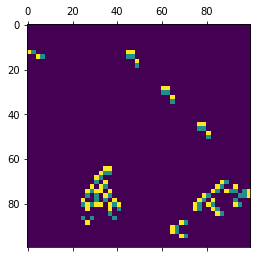

In [100]:
plt.matshow(data[-1,150:250,270:370])

In [113]:
radious = 1
neighborhood = helpers.moore([radious,radious])
data = getProblem(data[:,150:250,270:370],neighborhood,1,-1)

12

3
4
5
67
8

9
10
11
12
13
1415

16
17
18
19
20
2122
23

24
25
26
2728

29
30
3132

3334

35
36
37
38
39
40
41
4243

44
45
46
47
48
49
50
51
52
53
5455

56
57
58
59
60
61
62
63
64
65
6667

68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
8687

88
89
9091

92
93
94
9596

97
98
99
100
101
102
103
104
105
106
107
108
109
110
111112

113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138139

140
141
142143

144
145
146147

148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [9]:
modelGGA = GGA(data,np.shape(data)[1]-1,path="saves/Experiment1",verbose=0,noChilds=10,noChromosomes=100)

In [11]:
modelGGA.run()

config saved at saves/Experiment1/29_01_20_18_57_40/config.json
iteration 1
goal = 1goal = 2goal = 3


goal 1 elapsed time: 0.03500056266784668goal 3 elapsed time: 0.031000375747680664

goal 2 elapsed time: 0.04399847984313965
iteration 2
goal = 1goal = 2
goal = 3goal 2 elapsed time: 0.01599884033203125

goal 1 elapsed time: 0.026993989944458008

goal 3 elapsed time: 0.037999868392944336
iteration 3
goal = 1goal = 2goal = 3


goal 3 elapsed time: 0.03299856185913086goal 2 elapsed time: 0.04000067710876465goal 1 elapsed time: 0.04699850082397461


iteration 4
goal = 1goal = 2
goal = 3

goal 2 elapsed time: 0.0279998779296875goal 1 elapsed time: 0.03899860382080078

goal 3 elapsed time: 0.0409998893737793
iteration 5
goal = 1
goal 1 elapsed time: 0.010998725891113281goal = 2
goal = 3

goal 2 elapsed time: 0.030000925064086914goal 3 elapsed time: 0.03199887275695801

iteration 6
goal = 1goal = 2goal = 3


goal 3 elapsed time: 0.03200078010559082goal 1 elapsed time: 0.03899645805358887
goa

In [73]:
caggamodel = CAModel(modelGGA.rules,neighborhood,1,-1)

NameError: name 'modelGGA' is not defined

In [140]:
modelOCAT = OCAT(data,np.shape(data)[1]-1)

problem
matrix
domain
binarized
bdomains
indexes
dindex
pos index
neg index
auxiliar
terms


In [141]:
modelOCAT.train()

training for value 1
151
74
68
44
34
32
29
29
29
29
29
29
29
29
29
28
28
26
26
26
26
25
25
25
25
25
24
24
24
24
23
23
23
23
23
23
23
22
22
22
22
22
22
22
22
22
22
difficult element 100/1000 to delete it
22
22
22
22
22
22
22
22
22
22
difficult element 200/1000 to delete it
22
22
22
22
22
22
22
22
22
22
difficult element 300/1000 to delete it
22
21
19
19
19
19
19
19
19
19
19
19
difficult element 100/1000 to delete it
19
19
19
19
19
19
19
19
17
17
17
17
17
17
17
17
17
17
difficult element 100/1000 to delete it
17
17
17
17
17
17
17
17
17
17
difficult element 200/1000 to delete it
17
17
17
17
17
17
17
17
17
17
difficult element 300/1000 to delete it
17
15
15
15
14
14
14
14
14
14
13
13
13
13
13
12
12
12
11
11
11
11
11
10
10
10
10
10
10
10
10
10
10
difficult element 100/1000 to delete it
10
10
10
10
10
8
8
8
8
8
8
8
8
8
8
difficult element 100/1000 to delete it
8
8
8
8
8
8
8
8
8
8
difficult element 200/1000 to delete it
8
8
8
8
8
8
8
8
8
8
difficult element 300/1000 to delete it
8
7
7
7
7
7
7

[[1,
  [{(2, 2, '<'), (4, 3, '<'), (5, 1, '<')},
   {(0, 3, '>='), (3, 3, '<'), (5, 2, '>='), (7, 2, '<')},
   {(0, 2, '<'), (4, 3, '<')},
   {(4, 3, '<'), (5, 1, '<')},
   {(3, 1, '<'),
    (4, 2, '>='),
    (5, 1, '<'),
    (5, 3, '<'),
    (7, 3, '<'),
    (8, 3, '>=')},
   {(0, 2, '>='),
    (1, 2, '<'),
    (2, 3, '>='),
    (3, 3, '>='),
    (4, 2, '>='),
    (5, 1, '<')},
   {(2, 3, '<'), (3, 1, '<'), (4, 2, '>='), (5, 1, '<'), (8, 1, '>=')},
   {(3, 1, '<'),
    (3, 3, '>='),
    (4, 2, '>='),
    (5, 1, '<'),
    (6, 2, '<'),
    (6, 3, '<'),
    (7, 1, '<'),
    (7, 3, '>='),
    (8, 2, '<')},
   {(0, 1, '<'),
    (1, 2, '>='),
    (2, 2, '>='),
    (4, 2, '>='),
    (5, 1, '<'),
    (5, 3, '<'),
    (6, 1, '<'),
    (8, 3, '<')},
   {(0, 3, '<'),
    (1, 3, '>='),
    (2, 2, '<'),
    (3, 1, '<'),
    (4, 2, '>='),
    (6, 3, '<'),
    (8, 1, '<')},
   {(4, 2, '>='),
    (5, 1, '<'),
    (5, 3, '<'),
    (6, 1, '<'),
    (6, 2, '<'),
    (8, 2, '>=')},
   {(0, 1, '<'),
    (

In [144]:
id = 300
count = {}
other = {}
for id in range(len(data)):
    for op in modelOCAT.rules2:
        if modelOCAT.rules2[op](data[id,:-1]) and op == data[id,-1]:
            if op not in count:
                count[op] = 0
            count[op] +=1
            break
        if modelOCAT.rules2[op](data[id,:-1]) and  op != data[id,-1]:
            if op not in other:
                other[op] = 0
            other[op] +=1
            break
count,other

({1: 1872811, 2: 50416, 3: 14859}, {1: 35617, 3: 16297})

In [145]:
caocatmodel = CAModel(modelOCAT.rules2,neighborhood,1,-1)

In [146]:
data= np.load("data/data.npy")
data = data[:,150:250,270:370]
data=np.array(data)
values = {}
count = 0
for state in data:
    for row in state:
        for j,col in enumerate(row):
            if col not in values:
                count+=1
                values[col] = count
            row[j] = values[col]

Testing:
state 1/200
Static : 9477/9532
Dynamic : 0/468
state 2/200
Static : 9477/9528
Dynamic : 0/472
state 3/200
Static : 9457/9508
Dynamic : 0/492
state 4/200
Static : 9434/9488
Dynamic : 0/512
state 5/200
Static : 9409/9472
Dynamic : 0/528
state 6/200
Static : 9411/9472
Dynamic : 0/528
state 7/200
Static : 9393/9452
Dynamic : 0/548
state 8/200
Static : 9386/9444
Dynamic : 0/556
state 9/200
Static : 9348/9428
Dynamic : 0/572
state 10/200
Static : 9377/9444
Dynamic : 0/556
state 11/200
Static : 9395/9468
Dynamic : 0/532
state 12/200
Static : 9424/9492
Dynamic : 0/508
state 13/200
Static : 9444/9504
Dynamic : 0/496
state 14/200
Static : 9448/9508
Dynamic : 0/492
state 15/200
Static : 9446/9504
Dynamic : 0/496
state 16/200
Static : 9441/9496
Dynamic : 0/504
state 17/200
Static : 9405/9472
Dynamic : 0/528
state 18/200
Static : 9395/9464
Dynamic : 0/536
state 19/200
Static : 9394/9464
Dynamic : 0/536
state 20/200
Static : 9405/9468
Dynamic : 0/532
state 21/200
Static : 9396/9464
Dynamic 

<module 'matplotlib.pyplot' from 'C:\\Users\\hecto\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

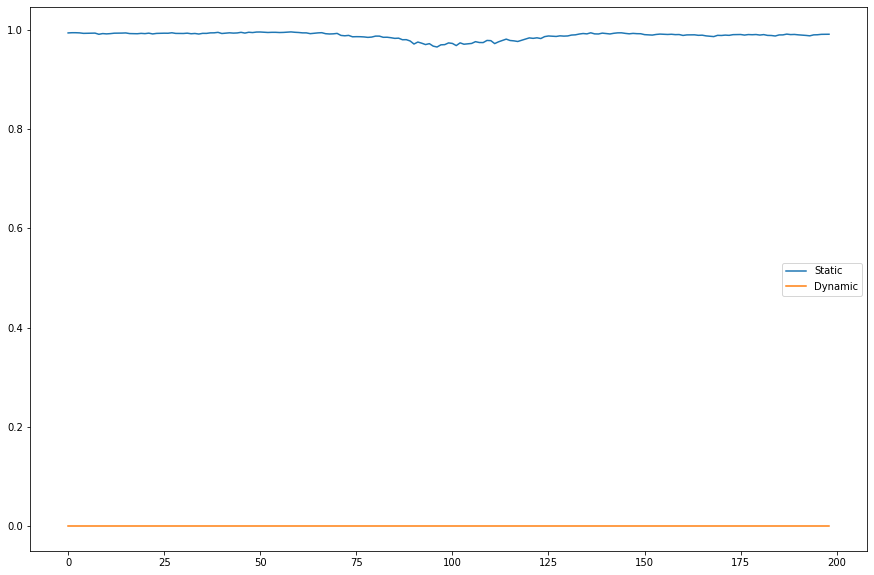

In [147]:
test1 = Testing1(data,caocatmodel,verbose=1)
test1.run()
test1.plot()

Testing:
state 1/200
Static : 9526/9532
Dynamic : 39/468
state 2/200
Static : 9522/9528
Dynamic : 36/472
state 3/200
Static : 9502/9508
Dynamic : 42/492
state 4/200
Static : 9480/9488
Dynamic : 39/512
state 5/200
Static : 9466/9472
Dynamic : 42/528
state 6/200
Static : 9466/9472
Dynamic : 44/528
state 7/200
Static : 9445/9452
Dynamic : 41/548
state 8/200
Static : 9437/9444
Dynamic : 51/556
state 9/200
Static : 9419/9428
Dynamic : 40/572
state 10/200
Static : 9437/9444
Dynamic : 43/556
state 11/200
Static : 9460/9468
Dynamic : 46/532
state 12/200
Static : 9484/9492
Dynamic : 36/508
state 13/200
Static : 9498/9504
Dynamic : 36/496
state 14/200
Static : 9502/9508
Dynamic : 35/492
state 15/200
Static : 9498/9504
Dynamic : 38/496
state 16/200
Static : 9490/9496
Dynamic : 39/504
state 17/200
Static : 9463/9472
Dynamic : 35/528
state 18/200
Static : 9458/9464
Dynamic : 47/536
state 19/200
Static : 9458/9464
Dynamic : 42/536
state 20/200
Static : 9463/9468
Dynamic : 44/532
state 21/200
Static 

<module 'matplotlib.pyplot' from 'C:\\Users\\hecto\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

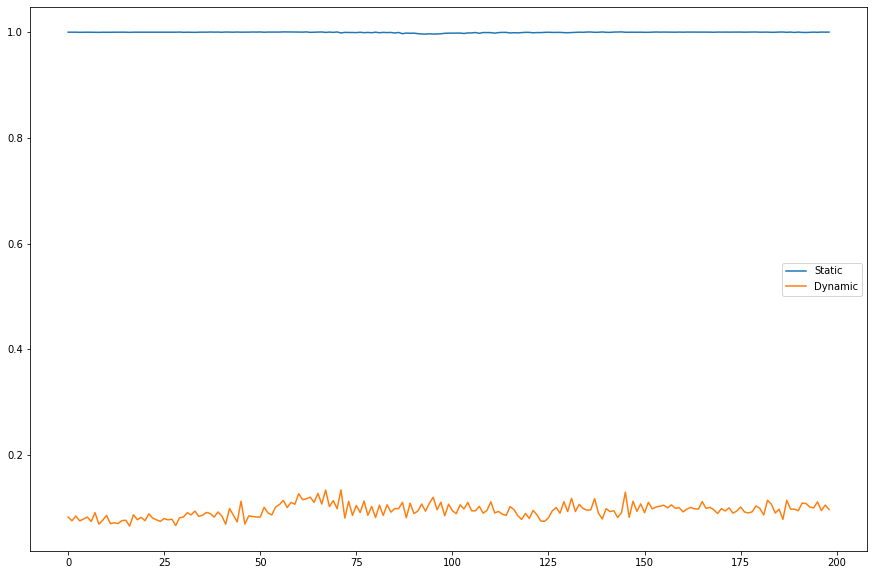

In [60]:
test2 = Testing1(data,caggamodel,verbose=1)
test2.run()
test2.plot()

In [33]:
data.shape

(200, 100, 100)

<module 'matplotlib.pyplot' from 'C:\\Users\\hecto\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

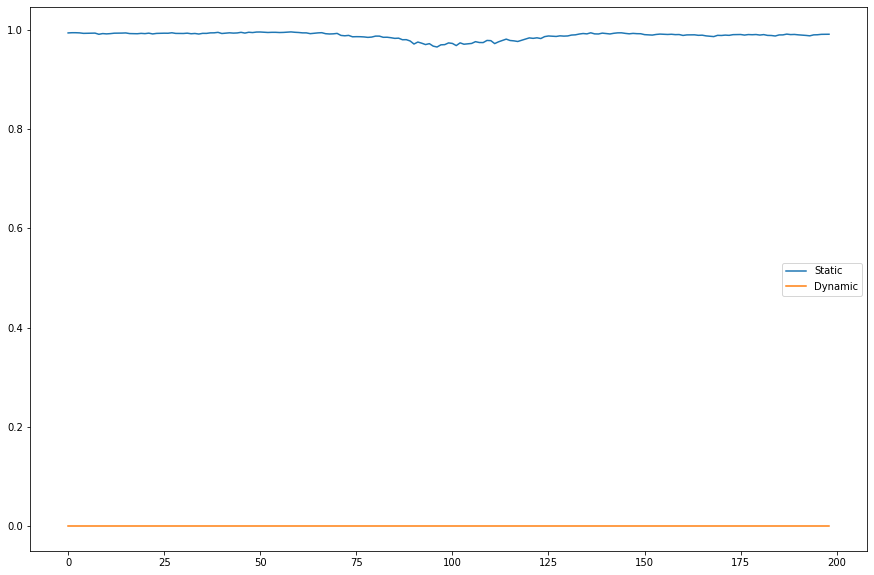

In [61]:
test1.plot()

<module 'matplotlib.pyplot' from 'C:\\Users\\hecto\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

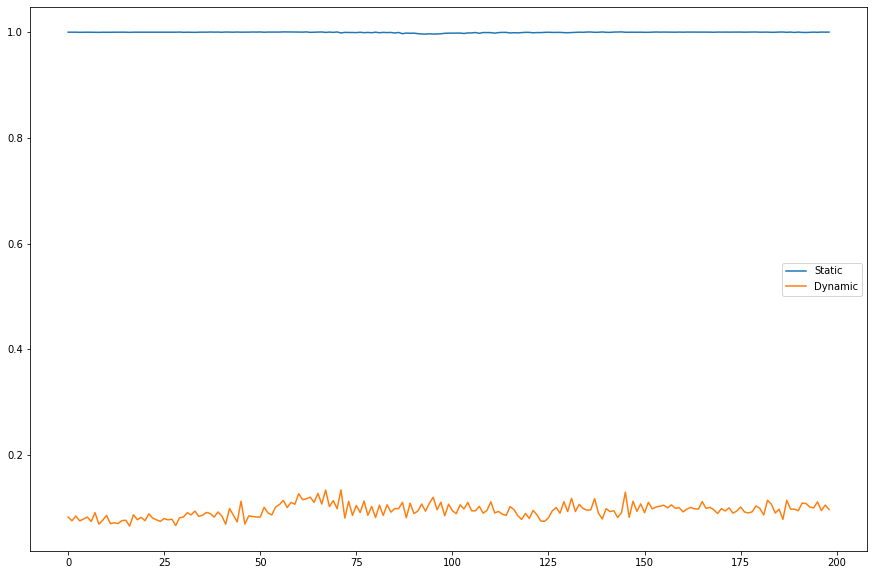

In [62]:
test2.plot()

In [ ]:
test1.results

In [ ]:
np.save("data/data.npy",images)